# Density Function Theory para el atomo de Helio

Nicolas Unger

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Hay que resolver la ecuacion de schrödinger radial:

\begin{equation}
\left[-\frac{1}{2}\nabla^2 - \frac{1}{r}\right]u(r) = Eu(r)
\end{equation}

La tengo que expresar en la forma:

\begin{equation}
\ddot{u}(r) = F[u(t),t]
\end{equation}

Resulta:

\begin{equation}
\ddot{u}(r) = -2u(r)\left[E+\frac{1}{r}\right]-\frac{2}{r}\dot{u}(t)
\end{equation}

## Integracion numerica de la ec diferencial
### Uso el metodo de Verlet

In [35]:
# Inicializacion de vectores

nsize = 1000 # Numero de puntos
h = 0.01
x = np.zeros((nsize))
x[0] = h
for i in range(1,nsize):
    x[i] = h*(i+1)

pos = np.zeros((nsize)) # u(r)
vel = np.zeros((nsize)) # u'(r)
fza = np.zeros((nsize)) # u''(r)

In [27]:
# Definicion del algoritmo de Verlet

def verlet(pos, vel, fza, x, h, E):
    """ Calcula un paso de verlet para la ecuacion diferencial."""    
    for i in range(len(vel)-1,-1,-1):
        # Primer paso: hace medio paso para la velocidad y un paso para la posicion
        vel[i-1] = vel[i] + 0.5 * fza[i] * h
        pos[i-1] = pos[i] + vel[i] * h
        
        # Segundo paso: Actualizo las fuerzas con la velocidad intermedia
        fza[i-1] = -2*pos[i-1]*(E+(1/x[i-1])) - (2/x[i-1])*vel[i-1]
        
        # Tercer paso: Vuelvo a actualizar la velocidad con la nueva fuerza
        vel[i-1] = vel[i-1] + 0.5 * fza[i-1] * h
        
        return pos, vel, fza
    

In [ ]:
def FZA(pos, vel, h, x):
    """ Fuerza de la ecuacion diferencial. """

In [36]:
def verlet(pos, vel, fza, x, h, E):
    """ Calcula un paso de verlet para la ecuacion diferencial."""    
    for i in range(0,len(vel)):
        # Primer paso: hace medio paso para la velocidad y un paso para la posicion
        vel[i+1] = vel[i] + 0.5 * fza[i] * h
        pos[i+1] = pos[i] + vel[i] * h
        
        # Segundo paso: Actualizo las fuerzas con la velocidad intermedia
        fza[i+1] = 2*((1/x[i+1]) - E)*pos[i+1]
        
        # Tercer paso: Vuelvo a actualizar la velocidad con la nueva fuerza
        vel[i+1] = vel[i+1] + 0.5 * fza[i+1] * h
        
        return pos, vel, fza

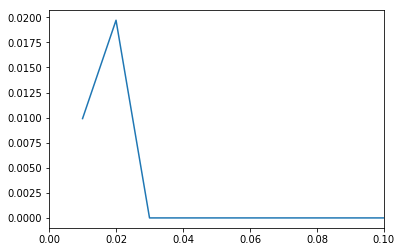

In [40]:
E = -0.5

# Inicializo el primer valor de los tres vectores
pos[0] = np.exp(-x[0])*x[0]
vel[0] = np.exp(-x[0])*(1-x[0])
#fza[-1] = -2*pos[-1]*(E+(1/x[-1])) - (2/x[-1])*vel[-1]
fza[0] = -2*((1/x[0]) + E)*pos[0]

pos, vel, fza = verlet(pos, vel, fza, x, h, E)

plt.plot(x,pos)
plt.xlim((0,0.1))
plt.show()